IMPORTING LIBRARIES 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [15]:

bank = pd.read_csv('BankChurners.csv')

In [16]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#EDA to detect missing values
for col in bank.columns:
    print(bank[col].value_counts())


In [18]:
# Count how many duplicate rows exist
duplicate_count = bank.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 0


In [19]:
# Exploring unknown income rows
unknown_income= bank[bank['Income_Category'] == 'Unknown'].head()
unknown_income

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,0.000055,0.999940
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,0.000121,0.999880
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.997800,0.002197
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209,0.000317,0.999680
58,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,6273.0,978,5295.0,2.275,1359,25,1.083,0.156,0.000057,0.999940


In [ ]:
# drop unneccessary columns.
bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


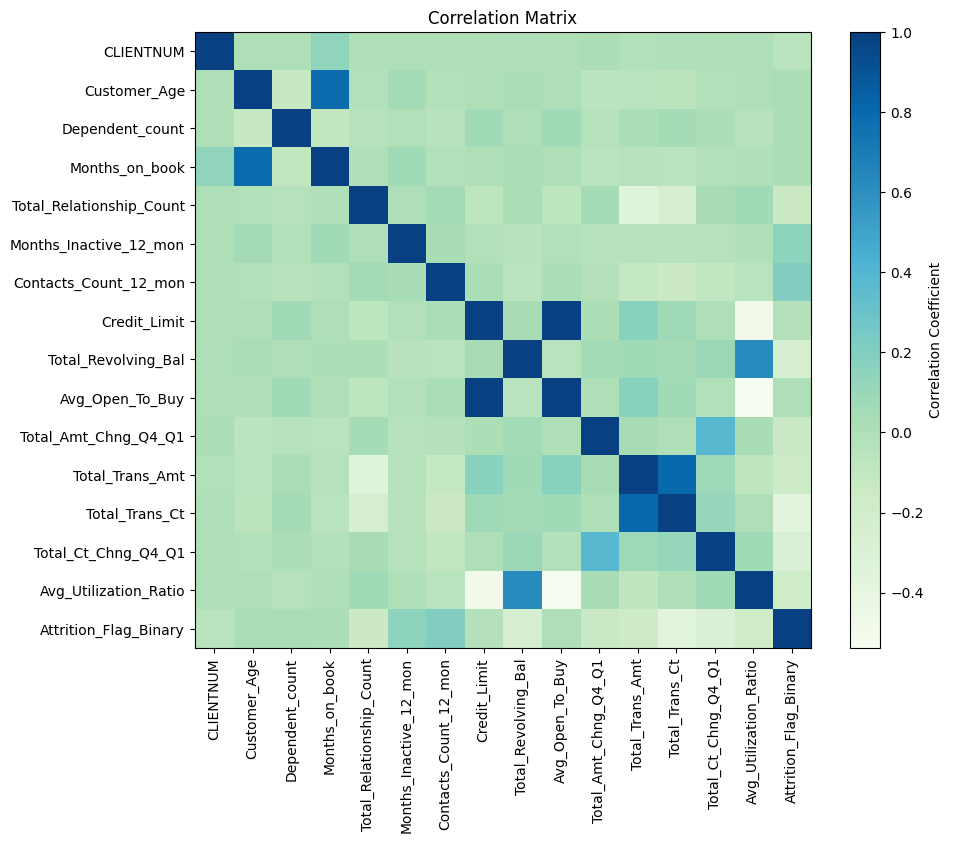

In [36]:
# Compute correlation matrix
corr_matrix = bank.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='GnBu', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
# Plot with matplotlib

plt.show()

In [22]:
 #check to see relation between income & credit limit
bank[bank['Income_Category'] != 'Unknown'].groupby('Income_Category')['Credit_Limit'].mean().sort_values()


Income_Category
Less than $40K     3754.404521
$40K - $60K        5462.259832
$60K - $80K       10758.772967
$80K - $120K      15809.890945
$120K +           19717.322558
Name: Credit_Limit, dtype: float64

In [23]:
##impute unknown income 
# Define bins and labels
bins = [0, 10000, 15000, 20000, 30000, bank['Credit_Limit'].max()]
labels = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Create a temporary bin column
bank['Credit_Bin'] = pd.cut(bank['Credit_Limit'], bins=bins, labels=labels)

# Map most frequent income category per bin
income_map = (
    bank[bank['Income_Category'] != 'Unknown']
    .groupby('Credit_Bin')['Income_Category']
    .agg(lambda x: x.mode()[0])
)

# Impute 'Unknown' values
mask = bank['Income_Category'] == 'Unknown'
bank.loc[mask, 'Income_Category'] = bank.loc[mask, 'Credit_Bin'].map(income_map)

bank['Income_Category'].value_counts()



C:\Users\Omar-\AppData\Local\Temp\ipykernel_23192\3324469520.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Credit_Bin')['Income_Category']


Income_Category
Less than $40K    4307
$80K - $120K      1901
$40K - $60K       1790
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [24]:
# Insantiate Model
model= LogisticRegression(class_weight='balanced')

# Convert target to binary: 1 if Attrited Customer, 0 otherwise
bank['Attrition_Flag_Binary'] = np.where(bank['Attrition_Flag'] == 'Attrited Customer', 1, 0)


# Exclude unhelpful features
X = bank.drop(columns=['CLIENTNUM', 'Attrition_Flag', 'Attrition_Flag_Binary'])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = bank['Attrition_Flag_Binary']

#Train_Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



#Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit the training data
model.fit(X_train_scaled,y_train)

#Predict 
predictions= model.predict(X_test_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1464  237]
 [  62  263]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.53      0.81      0.64       325

    accuracy                           0.85      2026
   macro avg       0.74      0.83      0.77      2026
weighted avg       0.89      0.85      0.86      2026



In [37]:
# Threshold tuning for churn prediction

# Get predicted probabilities for churn (class 1)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold (0.4)
new_threshold = 0.4
predictions_new = (y_probs >= new_threshold).astype(int)

# Evaluate performance with new threshold
print(confusion_matrix(y_test, predictions_new))
print(classification_report(y_test, predictions_new))

[[1380  321]
 [  48  277]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1701
           1       0.46      0.85      0.60       325

    accuracy                           0.82      2026
   macro avg       0.71      0.83      0.74      2026
weighted avg       0.89      0.82      0.84      2026



Average Precision Score: 0.73


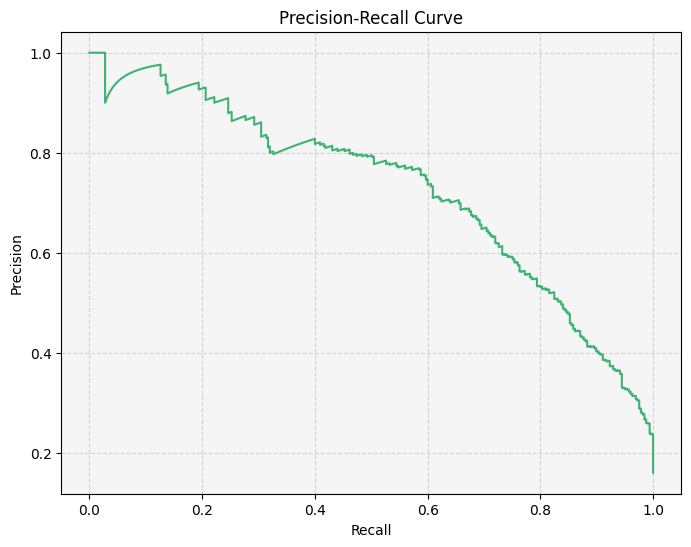

In [28]:
# Calculate precision and recall values

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate average precision score
ap_score = average_precision_score(y_test, y_probs)
print(f"Average Precision Score: {ap_score:.2f}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='mediumseagreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_facecolor('whitesmoke')
plt.show()